In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/Colab Notebooks/')
os.getcwd()

Mounted at /content/drive/


'/content/drive/MyDrive/Colab Notebooks'

In [1]:
import os
import tensorflow as tf
import glob
import pathlib
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Dense,Conv2D,Flatten

In [ ]:
## Dat Processing

# dir = "Colab Notebooks/"
dir = ""
train_dir = dir + "birds315/train/"
test_dir = dir + "birds315/test"
valid_dir = dir + "birds315/valid"

In [ ]:
def process(data):
    path=pathlib.Path(data)#converting the string to path
    filepaths=list(path.glob(r"*/*.jpg"))#Going through all the subpaths 
    labels=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))#Separating the label from filepath and storing it
    df1=pd.Series(filepaths,name='filepaths').astype(str)
    df2=pd.Series(labels,name='labels')
    df=pd.concat([df1,df2],axis=1)#Making the dataframe
    return df


In [ ]:
df_train=process(train_dir)
df_test=process(test_dir)
df_valid=process(valid_dir)

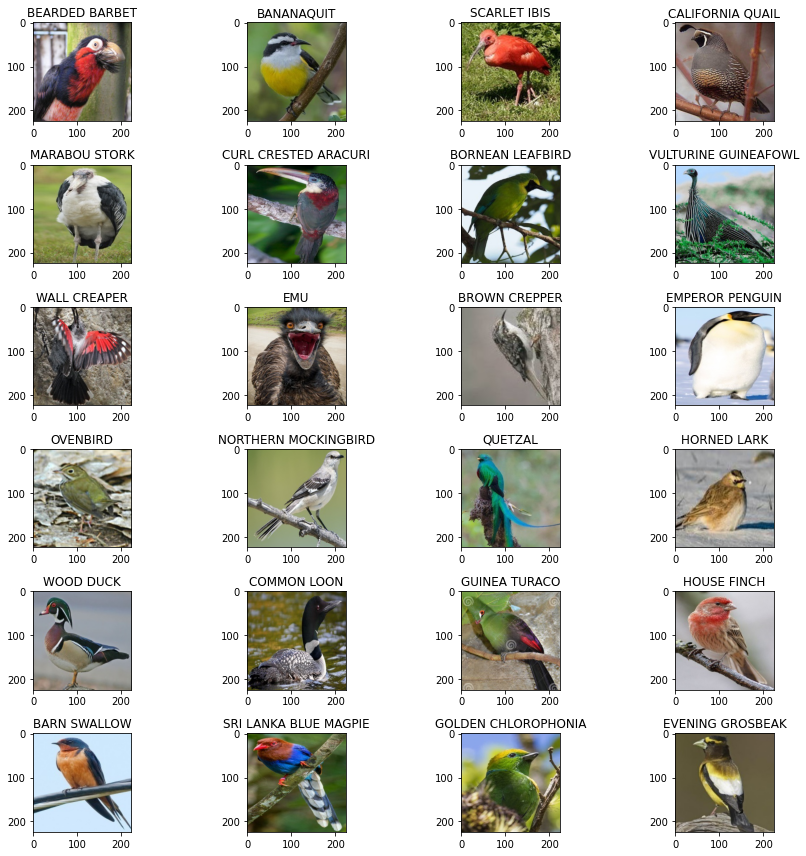

In [ ]:
# Data Visualization
df_train=df_train.sample(frac=1).reset_index(drop=True)#Shuffling the dataframe so we can get random bird pictures
fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(12,12))

for i,ax in enumerate(axes.flat):
    x=plt.imread(df_train['filepaths'][i])#reading the image
    ax.imshow(x)
    ax.set_title(df_train['labels'][i])
plt.tight_layout()    
plt.show()  

In [ ]:
# Data Augmentation
train_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
test_generator=ImageDataGenerator( preprocessing_function=preprocess_input)
valid_generator=ImageDataGenerator( preprocessing_function=preprocess_input)

In [ ]:
# Reading Images from Data frame
train_image=train_generator.flow_from_dataframe(dataframe=df_train,
                                                x_col='filepaths',
                                                y_col='labels',
                                                target_size=(224,224),
                                                batch_size=16,
                                                subset='training',
                                                random_seed=42)

test_image = test_generator.flow_from_dataframe(
    dataframe=df_test,
    x_col='filepaths',
    y_col='labels',
    target_size=(224,224),
    batch_size=32
)

valid_image = test_generator.flow_from_dataframe(
    dataframe=df_valid,
    x_col='filepaths',
    y_col='labels',
    subset='training',
    target_size=(224,224),
    batch_size=32
)

Found 45980 validated image filenames belonging to 315 classes.
Found 1575 validated image filenames belonging to 315 classes.
Found 1575 validated image filenames belonging to 315 classes.


In [2]:
# Mobile Building
pretrained_model = ResNet50(
    input_shape=(224,224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False#We don't want to train again th resnet

94781440/94765736 [==============================] - 1s 0us/step


In [3]:
inputs = pretrained_model.input

x = Dense(120, activation='relu')(pretrained_model.output)
x = Dense(120, activation='relu')(x)#adding some custom layers of our coice

outputs = Dense(315, activation='softmax')(x)
#output choice
model = Model(inputs=inputs, outputs=outputs)

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
mo_fit=model.fit(train_image,validation_data=valid_image,epochs=15)

Epoch 1/5
   2/2874 [..............................] - ETA: 2:57:01 - loss: 5.8743 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
#  Model Plotting
pd.DataFrame(mo_fit.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(mo_fit.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(np.round(y_pred), y_test))

In [ ]:
y_pred = np.round(y_pred)
y_pred = y_pred.reshape(-1,)
y_test = y_test.astype('float')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), cmap= "Blues", linecolor = 'black' , linewidth = 1, annot = True, fmt='',xticklabels = classes, yticklabels = classes)
print('''[‘True Neg’,’False Pos’
,’False Neg’,’True Pos’]''')
plt.show()

In [ ]:
# Test correct and incorrect image predictions
img_path = 'birds315/test/ALBATROSS/1.jpg'
img_arr = cv2.imread(img_path)
# img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
classes = (test_generators.filenames).split()[0]
img_arr = crop_brain_contour(img_arr, False)
img_arr = cv2.resize(img_arr, (IMGS, IMGS))
plt.imshow(img_arr)
plt.show()
img_arr = img_arr.reshape(1, IMGS, IMGS, 3)
print(classes[int(np.round(model.predict(img_arr)[0][0]))])

In [ ]:
# Display No. of Layers
lay = []
for layer in model.layers:
    lay.append(layer.name)
    print(layer.name)

In [ ]:
# Read Image as array
def get_img_array(img_path, size):
    img_arr = cv2.imread(img_path)
    img_arr = crop_brain_contour(img_arr, False)
    img_arr = cv2.resize(img_arr, (IMGS, IMGS))
    img_arr = img_arr.reshape(1, IMGS, IMGS, 3)
    return img_arr

In [ ]:
# Prepare for gradcam
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = tf.keras.Input(shape = last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]
    
    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

In [ ]:
img_path = 'birds315/test/ALBATROSS/1.jpg'

In [ ]:
img_array = get_img_array(img_path, size = img_size)
# NORMAL/IM-0147-0001.jpeg
print(img_array.shape)

# # Make model
# model = model_builder(weights="imagenet")
# # Print what the top predicted class is
preds = model.predict(img_array)
# print(preds)
print("Predicted:", classes[int(np.round(model.predict(img_arr)[0][0]))])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)
# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
# super imposed heatmap on original image
import tensorflow
img = tf.keras.preprocessing.image.load_img(img_path)
img = tf.keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("RdYlGn_r")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = tensorflow.keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = tensorflow.keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.9 + img
superimposed_img = tensorflow.keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "grad_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
print("Predicted:", classes[int(np.round(model.predict(img_arr)[0][0]))])
plt.imshow(superimposed_img)
plt.show()
# display(Image(save_path))